# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

## 读取数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orignal_data = pd.read_csv('house_price.csv')
orignal_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## 评估与清洗数据

### 检查数据结构性问题

In [3]:
orignal_data.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
382,3570000,3150,3,1,2,yes,no,yes,no,no,0,no,furnished
505,2653000,4000,3,1,2,yes,no,no,no,yes,0,no,unfurnished
93,6300000,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
98,6293000,6600,3,2,3,yes,no,no,no,yes,0,yes,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
418,3360000,3500,4,1,2,yes,no,no,no,yes,2,no,unfurnished
121,5950000,7231,3,1,2,yes,yes,yes,no,yes,0,yes,semi-furnished
132,5810000,5200,3,1,3,yes,no,no,no,yes,0,no,semi-furnished
530,2240000,1950,3,1,1,no,no,no,yes,no,0,no,unfurnished
380,3605000,4500,2,1,1,yes,no,no,no,no,0,no,semi-furnished


可以轻易的看出，从该数据抽取的样本满足“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”的原则，因此其不存在结构性问题

### 检查数据内容性问题

我们可以先初步查看该数据集的信息

In [4]:
orignal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


从简介中我们可以得知，`mainroad`、`guestroom`、`basement`、`hotwaterheating`、`airconditioning`、`prefarea`、`furnishingstatus`应为分类变量

而这里却变成了字符串，因此需要对其种类变换

In [5]:
orignal_data['mainroad'] = orignal_data['mainroad'].astype('category')
orignal_data['guestroom'] = orignal_data['guestroom'].astype('category')
orignal_data['basement'] = orignal_data['basement'].astype('category')
orignal_data['hotwaterheating'] = orignal_data['hotwaterheating'].astype('category')
orignal_data['airconditioning'] = orignal_data['airconditioning'].astype('category')
orignal_data['prefarea'] = orignal_data['prefarea'].astype('category')
orignal_data['furnishingstatus'] = orignal_data['furnishingstatus'].astype('category')

再进行次检查

In [6]:
orignal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


现在便实现了分类变量的创建

#### 检查缺失值

In [7]:
orignal_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

很明显，每一列里都不存在缺失值，因此无需对缺失值进行处理

#### 检查重复值

根据数据变量的含义以及内容来看，允许变量重复，我们不需要对此数据检查是否存在重复值。

#### 检查不一致值

从数据的类别来看，分类变量是很有可能出现不一致值的，理想情况下是只有两种值，要一一查看

In [8]:
orignal_data['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [9]:
orignal_data['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [10]:
orignal_data['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [11]:
orignal_data['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [12]:
orignal_data['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [13]:
orignal_data['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [14]:
orignal_data['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

很明显，分类变量都只存在两种值，因此不一致值可以不进行处理

#### 处理无效与无意义值

In [15]:
orignal_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


从describe后可以看到，这个数据集也不存在无效与无意义值，因此也无需处理

## 保存数据

In [16]:
cleaned_data = orignal_data.copy()
cleaned_data.to_csv('cleaned_house_price.csv')

In [17]:
cleaned_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## 探索数据

此步骤旨在探讨房价与个要素之间的关系

首先看看房价的分布

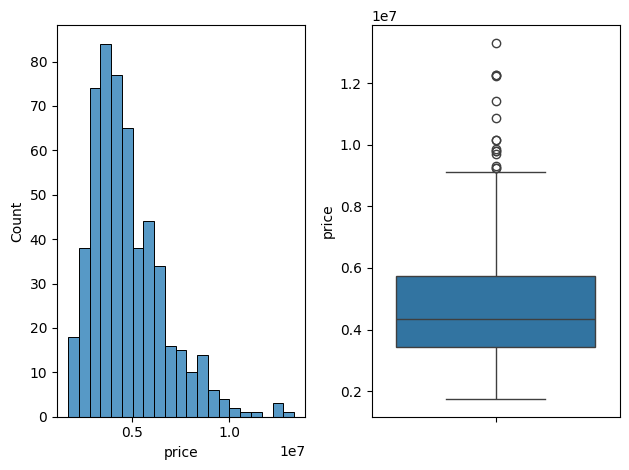

In [18]:
plt.rcParams["figure.autolayout"] = True
figsize,axes = plt.subplots(1,2)
sns.histplot(cleaned_data,x='price',ax=axes[0])
sns.boxplot(cleaned_data,y='price',ax=axes[1])
plt.show()

可以看出，房价呈现右偏态分布，总体价格偏低，但存在非常离谱的极大值

### 房价与面积关系

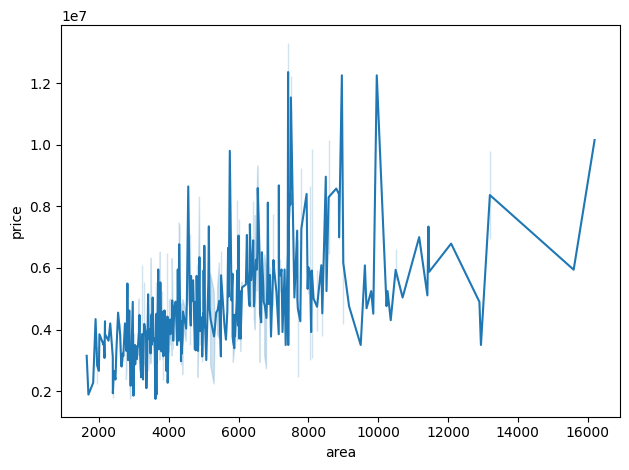

In [19]:
sns.lineplot(cleaned_data,x='area',y='price')
plt.show()

可以看出，随着面积的增加，房价呈现波动上升的趋势

### 房价与卧室数的关系

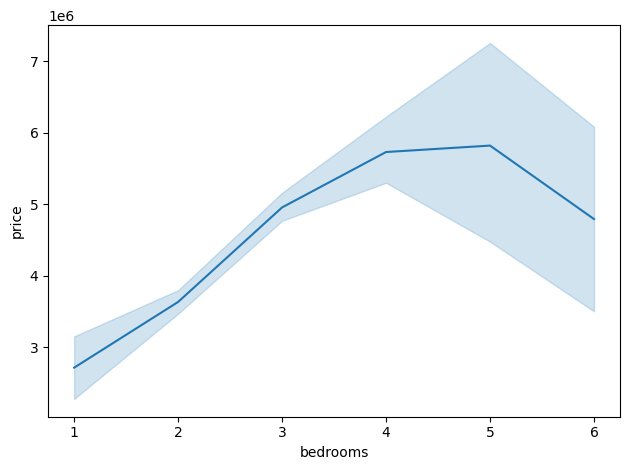

In [20]:
sns.lineplot(cleaned_data,x='bedrooms',y='price')
plt.show()

可以看见，随着卧室数的增加，房价也逐渐增加。但卧室数五个以上后呈现下降趋势

### 房价与浴室的关系

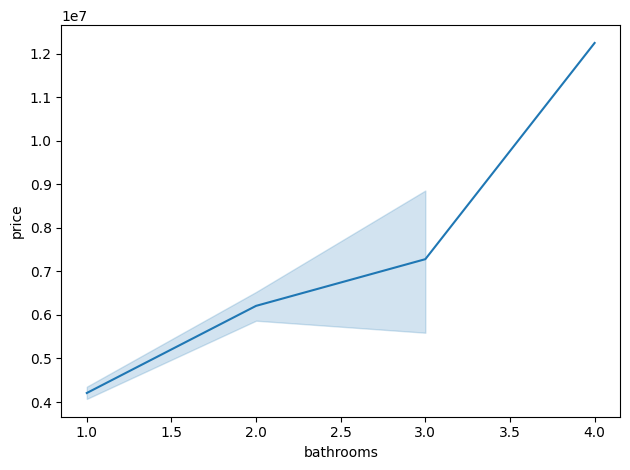

In [21]:
sns.lineplot(cleaned_data,x='bathrooms',y='price')
plt.show()

可以看见，随着浴室数的增加，房价也逐渐增加。

### 房价与楼层数的关系

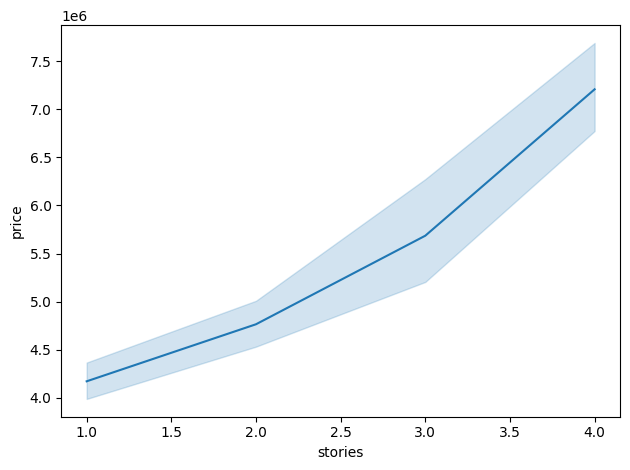

In [22]:
sns.lineplot(cleaned_data,x='stories',y='price')
plt.show()

可以看见，随着楼层数的增加，房价也逐渐增加。

### 房价与是否在主路的关系

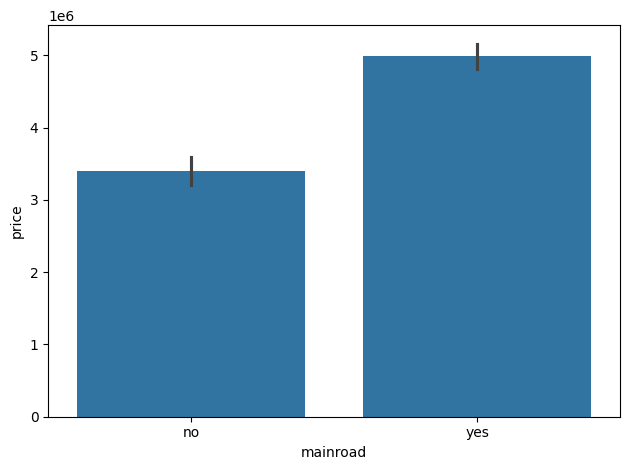

In [23]:
sns.barplot(cleaned_data,x='mainroad',y='price')
plt.show()

可以看见，在主路的房子偏多，且价格更高

### 房价与是否有宾客室的关系

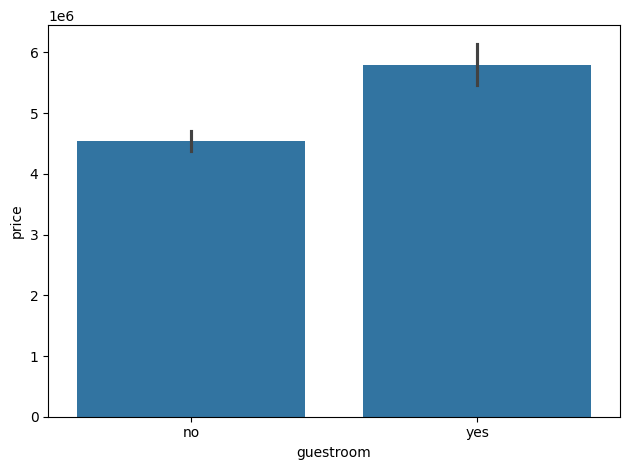

In [24]:
sns.barplot(cleaned_data,x='guestroom',y='price')
plt.show()

可以看出，有客室的房子的数量更多，且房价更高

### 房价与是否有热水器的关系

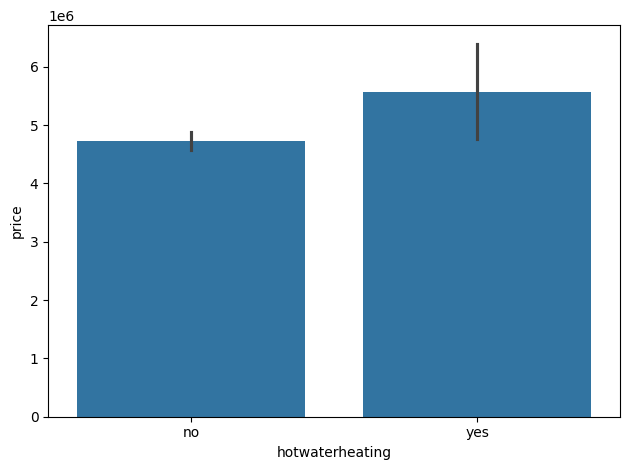

In [25]:
sns.barplot(cleaned_data,x='hotwaterheating',y='price')
plt.show()

可以看出，有热水器的房子的数量更多，且房价更高

### 房价与是否具备空调的关系

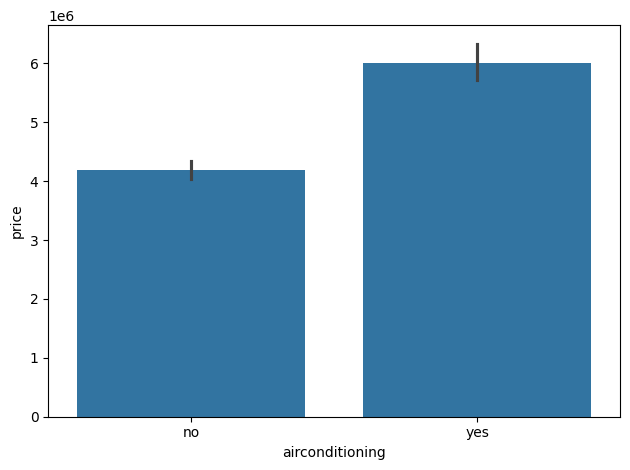

In [26]:
sns.barplot(cleaned_data,x='airconditioning',y='price')
plt.show()

可以看出，有空调的房子的数量更多，且房价更高

### 房价与车库容量的关系

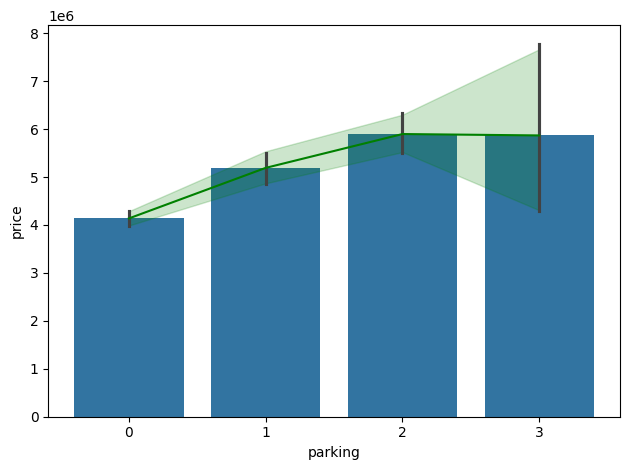

In [27]:
sns.barplot(cleaned_data,x='parking',y='price')
sns.lineplot(cleaned_data,x='parking',y='price',color='green')
plt.show()

可以看见，随着车库容量增加，房价逐渐上涨，但2-3的范围出现的小幅的下降

### 房价与是否在城市首选社区的关系

In [28]:
sns.barplot(cleaned_data,x='prefarea',y='price',ax=axes[1])
plt.show()

可以看见，在城市首选区域的房子价格更高

### 房价与装修状态的关系

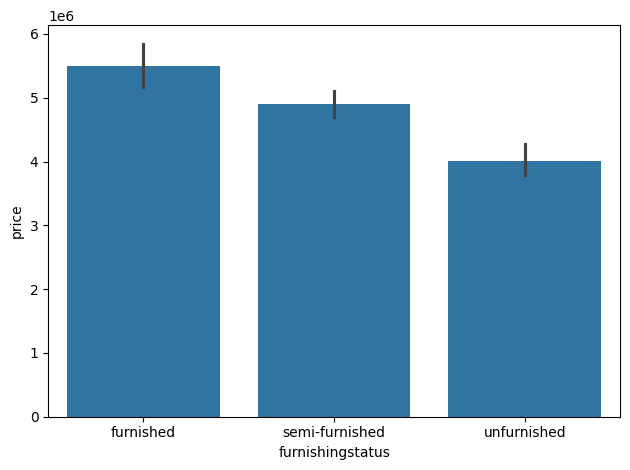

In [29]:
sns.barplot(cleaned_data,x='furnishingstatus',y='price')
plt.show()

可以看出，精装房价最高，简装次之，毛坯房价格最低

## 数据分析

现在，我们为了预测给定目标值的房价，需要根据清洗后的数据集建立一个线性回归模型

引入数据库

In [30]:
import statsmodels.api as sm

首先，重新建立一个副本

In [31]:
lr_house_price = cleaned_data.copy()
lr_house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### 将分类变量转化为虚拟变量

In [32]:
lr_house_price = pd.get_dummies(lr_house_price,columns=[
    'mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],
                                dtype=int,drop_first=True)
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


### 设置自变量与因变量

In [33]:
y = lr_house_price['price']
x = lr_house_price.drop('price',axis=1)

### 进行相关系数计算

In [34]:
x.corr().abs()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,0.009229,0.222393,0.234779,0.006156,0.142278
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270,0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,0.126252
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,0.132107
stories,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,0.172394,0.018847,0.293602,0.044425,0.003648,0.082972
parking,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,0.165705
mainroad_yes,0.288874,0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,0.011781,0.105423,0.199876,0.011450,0.133123
guestroom_yes,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,0.010308,0.138179,0.160897,0.005821,0.099023
basement_yes,0.047417,0.097312,0.102106,0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,0.117935
hotwaterheating_yes,0.009229,0.046049,0.067159,0.018847,0.067864,0.011781,0.010308,0.004385,1.000000,0.130023,0.059411,0.063819,0.059194
airconditioning_yes,0.222393,0.160603,0.186915,0.293602,0.159173,0.105423,0.138179,0.047341,0.130023,1.000000,0.117382,0.053179,0.094086


### 添加系数

In [35]:
x = sm.add_constant(x)
x

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [36]:
x.corr().abs() >0.8

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
const,False,False,False,False,False,False,False,False,False,False,False,False,False,False
area,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,False,True,False,False,False,False


可以发现，每个属性之间除了自身，都不存在强相关性

### 进行模型构建

In [37]:
# 选择显著水平 0.05
# 建立模型
model = sm.OLS(y,x).fit()
# 查看线性回归数据
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Sat, 16 Aug 2025   Prob (F-statistic):          9.07e-123
Time:                        22:17:35   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

可以看见，`const`、`furnishingstatus_semi-furnished`的p值大于显著水平0.05，这表明他们对数据不存在显著影响，因此可以删去

In [38]:
x = x.drop(['const','furnishingstatus_semi-furnished'],axis=1)
x

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,4,3,1,0,0,0,1,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0
4,7420,4,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,1,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,0
542,3620,2,1,1,0,1,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,0


重新进行回归检验

In [39]:
# 建立模型
model = sm.OLS(y,x).fit()
# 查看线性回归数据
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1003.
Date:                Sat, 16 Aug 2025   Prob (F-statistic):                        0.00
Time:                        22:17:37   Log-Likelihood:                         -8331.6
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     533   BIC:                                  1.674e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           244.6193     23.472     10.422      0.000     198.510     290.728
bedrooms                      1.156e+05   5.91e+04      1.957      0.051    -436.568    2.32e+05
bathrooms                      9.89e+05   1.01e+05      9.754      0.000     7.9e+05    1.19e+06
stories                       4.514e+05    6.4e+04      7.053      0.000    3.26e+05    5.77e+05
parking                       2.776e+05   5.81e+04      4.777      0.000    1.63e+05    3.92e+05
mainroad_yes                  4.253e+05   1.28e+05      3.312      0.001    1.73e+05    6.78e+05
guestroom_yes                  3.02e+05   1.31e+05      2.302      0.022    4.43e+04     5.6e+05
basement_yes                  3.504e+05    1.1e+05      3.198      0.001    1.35e+05    5.66e+05
hotwaterheating_yes           8.537e+05   2.23e+05      3.833      0.000    4.16e+05    1.29e+06
airconditioning_yes           8.687e+05   1.07e+05      8.088      0.000    6.58e+05    1.08e+06
prefarea_yes                  6.528e+05   1.15e+05      5.679      0.000    4.27e+05    8.79e+05
furnishingstatus_unfurnished -3.804e+05    9.6e+04     -3.962      0.000   -5.69e+05   -1.92e+05
==============================================================================
Omnibus:                       98.238   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.922
Skew:                           0.897   Prob(JB):                     3.62e-57
Kurtosis:                       5.869   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

现在$R^2$值有0.985，各个属性的p值不再大于显著水平0.05，所以该线性回归模型预测性强，可以使用

## 数据预测

In [40]:
cleaned_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


预测目标：
面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

In [41]:
new_observation = pd.DataFrame({
    'area':[6500],
    'bedrooms':[4],
    'bathrooms':[2],
    'stories':[2],
    'mainroad':['no'],
    'guestroom':['no'],
    'basement':['yes'],
    'hotwaterheating':['yes'],
    'airconditioning':['no'],
    'parking':['2'],
    'prefarea':['yes'],
    'furnishingstatus':['semi-furnished']
        })
new_observation

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6500,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


然后创建分类变量

In [42]:
new_observation['mainroad'] = pd.Categorical(new_observation['mainroad'],categories=['yes','no'])
new_observation['guestroom'] = pd.Categorical(new_observation['mainroad'],categories=['yes','no'])
new_observation['basement'] = pd.Categorical(new_observation['mainroad'],categories=['yes','no'])
new_observation['hotwaterheating'] = pd.Categorical(new_observation['mainroad'],categories=['yes','no'])
new_observation['airconditioning'] = pd.Categorical(new_observation['mainroad'],categories=['yes','no'])
new_observation['furnishingstatus'] = pd.Categorical(new_observation['mainroad'],categories=['furnished','semi-furnished','unfurnished'])
new_observation['prefarea'] = pd.Categorical(new_observation['prefarea'],categories=['yes','no'])

分类变量转化为虚拟变量

In [43]:
new_observation = pd.get_dummies(new_observation,dtype=int,drop_first=True,
                                 columns=['mainroad','guestroom',
                                         'basement','hotwaterheating',
                                         'airconditioning','furnishingstatus','prefarea'])

删除`furnishingstatus_semi-furnished`，确保dataframe里的属性与线性回归模型的属性完全相同

In [44]:
new_observation = new_observation.drop(['furnishingstatus_semi-furnished'],axis=1)
new_observation

,area,bedrooms,bathrooms,stories,parking,mainroad_no,guestroom_no,basement_no,hotwaterheating_no,airconditioning_no,furnishingstatus_unfurnished,prefarea_no
0,6500,4,2,2,2,1,1,1,1,1,0,0


In [45]:
# 检查是否都为同类型
new_observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   area                          1 non-null      int64 
 1   bedrooms                      1 non-null      int64 
 2   bathrooms                     1 non-null      int64 
 3   stories                       1 non-null      int64 
 4   parking                       1 non-null      object
 5   mainroad_no                   1 non-null      int64 
 6   guestroom_no                  1 non-null      int64 
 7   basement_no                   1 non-null      int64 
 8   hotwaterheating_no            1 non-null      int64 
 9   airconditioning_no            1 non-null      int64 
 10  furnishingstatus_unfurnished  1 non-null      int64 
 11  prefarea_no                   1 non-null      int64 
dtypes: int64(11), object(1)
memory usage: 228.0+ bytes


In [46]:
new_observation['parking'] = new_observation['parking'].astype(int)

In [48]:
model.predict(new_observation)

0    8.288493e+06
dtype: float64

可以预测到，该房的房价为8288493